In [1]:
#import pyarrow.feather as feather
import pandas as pd
import numpy as np
#from scipy.io import netcdf
import matplotlib.pyplot as plt 
import datetime
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [3]:
# it is better for visualisation if the columns date type (not int or str)
# when save df to csv, if the column names are date, they are saved as str
def convert_col_to_date(columns):
    
    # convert the columns type
    #columns = df.columns
    new_columns = []
    for col in columns:
        try:
            new_columns.append(pd.to_datetime(col).date())
        except: new_columns.append(col)
    return new_columns

In [4]:
# import freq df
freq_level =  pd.read_csv("dataset/modeling/sample/freq_sample.csv").set_index("proj_id")
print(freq_level.shape)
print(" ")
print("details: ")
print(f"daily_freq: {freq_level[freq_level['daily']].shape}")
print(f"mid_weekly_freq: {freq_level[freq_level['mid_weekly']].shape}")
print(f"weekly_freq: {freq_level[freq_level['weekly']].shape}")
print(f"fortnight_freq: {freq_level[freq_level['fortnight']].shape}")
print(f"low_freq_freq: {freq_level[freq_level['low_freq']].shape}")

freq_level

(25, 7)
 
details: 
daily_freq: (5, 7)
mid_weekly_freq: (5, 7)
weekly_freq: (5, 7)
fortnight_freq: (5, 7)
low_freq_freq: (5, 7)


,daily,mid_weekly,weekly,fortnight,low_freq,freq,length
proj_id,,,,,,,
BE_15166,True,False,False,False,False,1.0,615
TH_5229210601,True,False,False,False,False,1.0,2192
BE_5600,True,False,False,False,False,1.0,2829
BY_24158,True,False,False,False,False,1.0,4267
BE_209,True,False,False,False,False,1.0,5906
BY_6166,False,True,False,False,False,4.0,114
HE_12213,False,True,False,False,False,4.0,1376
NW_80303559,False,True,False,False,False,4.0,1489
NI_100000565,False,True,False,False,False,4.0,2607


In [5]:
# import t s and convert into date type
grouped_t_s = pd.read_csv("dataset/modeling/sample/sample_t_s.csv").set_index("proj_id")
grouped_t_s.columns = convert_col_to_date(grouped_t_s.columns)
# drop colmns after 2011.11.30 bcs not existing in temp and prec
grouped_t_s= grouped_t_s.drop(grouped_t_s.columns[-33:-2],axis=1)
print(grouped_t_s.shape)
grouped_t_s.head()

(25, 6546)


,1995-01-01,1995-01-02,1995-01-03,1995-01-04,1995-01-05,1995-01-06,1995-01-07,1995-01-08,1995-01-09,1995-01-10,...,2012-11-23,2012-11-24,2012-11-25,2012-11-26,2012-11-27,2012-11-28,2012-11-29,2012-11-30,freq,length
proj_id,,,,,,,,,,,,,,,,,,,,,
BE_15166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,615
TH_5229210601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,502.21600,502.21075,502.20675,502.19800,502.21375,502.24650,502.44375,502.54375,1.0,2192
BE_5600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.06000,45.07000,45.08000,45.09000,45.10000,45.10000,45.13000,45.15000,1.0,2829
BY_24158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,413.13375,413.13917,413.15021,413.16542,413.17937,413.19063,413.21208,413.17188,1.0,4267
BE_209,33.87,33.87,33.8,33.8,33.81,33.85,33.82,33.81,33.86,33.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5906


In [6]:
# import ave_temp 
ave_temp = pd.read_csv("dataset/modeling/sample/sample_temp.csv").set_index("proj_id")
ave_temp.columns = convert_col_to_date(ave_temp.columns)
print(ave_temp.shape)
ave_temp.head()


(25, 6545)


,1995-01-01,1995-01-02,1995-01-03,1995-01-04,1995-01-05,1995-01-06,1995-01-07,1995-01-08,1995-01-09,1995-01-10,...,2012-11-22,2012-11-23,2012-11-24,2012-11-25,2012-11-26,2012-11-27,2012-11-28,2012-11-29,2012-11-30,freq
proj_id,,,,,,,,,,,,,,,,,,,,,
BE_15166,24.0,0.0,-9.0,-41.0,-60.0,-70.0,-61.0,-64.0,-18.0,22.0,...,62.0,36.0,65.0,82.0,70.0,79.0,62.0,41.0,19.0,1.0
TH_5229210601,-8.0,-26.0,-44.0,-97.0,-106.0,-99.0,-94.0,-98.0,-47.0,-2.0,...,37.0,34.0,50.0,69.0,56.0,55.0,37.0,2.0,-17.0,1.0
BE_5600,23.0,-1.0,-10.0,-43.0,-62.0,-72.0,-63.0,-65.0,-19.0,22.0,...,60.0,35.0,64.0,81.0,67.0,77.0,61.0,41.0,18.0,1.0
BY_24158,8.0,-21.0,-41.0,-79.0,-95.0,-94.0,-90.0,-80.0,-46.0,6.0,...,43.0,44.0,42.0,60.0,49.0,62.0,58.0,9.0,-4.0,1.0
BE_209,23.0,0.0,-8.0,-43.0,-60.0,-70.0,-61.0,-65.0,-18.0,22.0,...,62.0,35.0,65.0,81.0,68.0,78.0,61.0,42.0,20.0,1.0


In [7]:
# import the cum_prec 
cum_prec=pd.read_csv("dataset/modeling/sample/sample_prec.csv").set_index("proj_id")
cum_prec.columns = convert_col_to_date(cum_prec.columns)
print(cum_prec.shape)
cum_prec.head()

(25, 6545)


,1995-01-01,1995-01-02,1995-01-03,1995-01-04,1995-01-05,1995-01-06,1995-01-07,1995-01-08,1995-01-09,1995-01-10,...,2012-11-22,2012-11-23,2012-11-24,2012-11-25,2012-11-26,2012-11-27,2012-11-28,2012-11-29,2012-11-30,freq
proj_id,,,,,,,,,,,,,,,,,,,,,
BE_15166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,33.0,10.0,1.0,11.0,29.0,55.0,151.0,2.0,1.0
TH_5229210601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,69.0,69.0,272.0,140.0,2.0,1.0
BE_5600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,33.0,10.0,1.0,11.0,33.0,57.0,156.0,2.0,1.0
BY_24158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,145.0,152.0,0.0,1.0
BE_209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.0,12.0,0.0,14.0,19.0,90.0,193.0,3.0,1.0


In [8]:
###########################################################################################################

# func

In [9]:
# create df for a t s (one row in grouped_t_s df)
def create_ts_df(row):
    bgr = row.name
    idx = row.dropna().index[:-2]
    ts = row[idx]
    temp = ave_temp[idx].loc[bgr]
    prec = cum_prec[idx].loc[bgr]
    df = pd.DataFrame({"ts":ts,"temp": temp,"prec":prec, })
    return df


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


def split_df(reframed):
    # split into train and test sets, 
    values = reframed.values
    n_train = int(len(reframed)*0.8)
    train = values[:n_train, :]
    test = values[n_train:, :]
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    return train_X, train_y, test_X, test_y


# pick t s

In [37]:
# apply the func
ts1 = grouped_t_s.iloc[4]
df = create_ts_df(ts1)
print(df.shape)

(5906, 3)


Text(0.5, 1.0, 'prec')

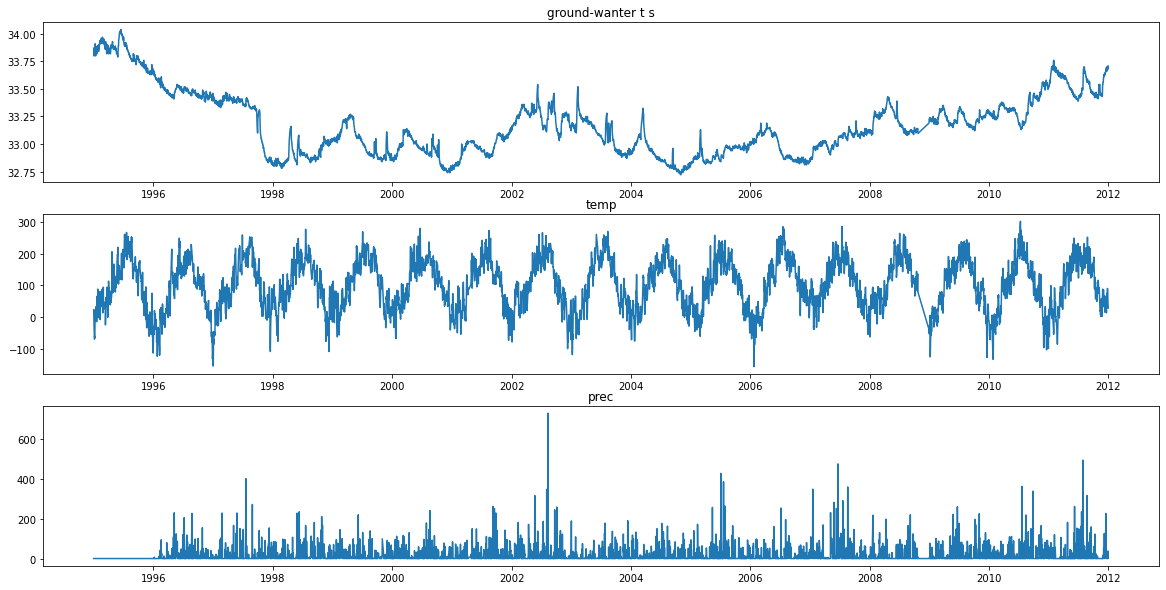

In [38]:
# plot a t s with its predictors
fig, axs = plt.subplots(3,1, figsize=(20,10))
#fig.suptitle('Vertically stacked subplots')
a,b = 0,400
axs[0].plot(df["ts"])
axs[0].set_title('ground-wanter t s')
axs[1].plot(df["temp"])
axs[1].set_title('temp')
axs[2].plot(df["prec"])
axs[2].set_title('prec')

# apply

(5905, 4)
input to be 3D [samples, timesteps(lag, features]

train: (4724, 1, 3) , (4724,) ,test: (1181, 1, 3) , (1181,)
Epoch 1/50
66/66 - 2s - loss: 0.2279 - val_loss: 0.2488
Epoch 2/50
66/66 - 0s - loss: 0.1504 - val_loss: 0.2110
Epoch 3/50
66/66 - 0s - loss: 0.1316 - val_loss: 0.1862
Epoch 4/50
66/66 - 0s - loss: 0.1135 - val_loss: 0.1558
Epoch 5/50
66/66 - 0s - loss: 0.0930 - val_loss: 0.1218
Epoch 6/50
66/66 - 0s - loss: 0.0679 - val_loss: 0.0549
Epoch 7/50
66/66 - 0s - loss: 0.0364 - val_loss: 0.0191
Epoch 8/50
66/66 - 0s - loss: 0.0224 - val_loss: 0.0146
Epoch 9/50
66/66 - 0s - loss: 0.0165 - val_loss: 0.0081
Epoch 10/50
66/66 - 0s - loss: 0.0149 - val_loss: 0.0096
Epoch 11/50
66/66 - 0s - loss: 0.0139 - val_loss: 0.0095
Epoch 12/50
66/66 - 0s - loss: 0.0127 - val_loss: 0.0089
Epoch 13/50
66/66 - 0s - loss: 0.0122 - val_loss: 0.0093
Epoch 14/50
66/66 - 0s - loss: 0.0120 - val_loss: 0.0101
Epoch 15/50
66/66 - 0s - loss: 0.0120 - val_loss: 0.0097
Epoch 16/50
66/66 - 0s - loss: 0.

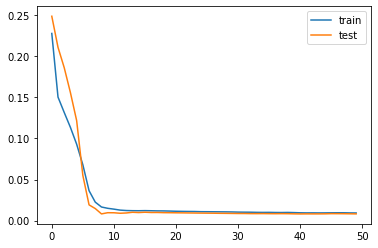

Test RMSE: 0.014


In [39]:
###############################################################

# convert the df to match lstm data
# load dataset
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[-2:], axis=1, inplace=True)
print(reframed.shape)
################################################################

train_X, train_y, test_X, test_y= split_df(reframed)
print("input to be 3D [samples, timesteps(lag, features]\n")
print(f"train: {train_X.shape} , {train_y.shape} ,test: {test_X.shape} , {test_y.shape}")
####################################################################

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
##############################################################################

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
##################################################################################

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = scaler.inverse_transform(np.concatenate((yhat, test_X[:, 1:]), axis=1))[:,0]
#inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = scaler.inverse_transform(np.concatenate((test_y, test_X[:, 1:]), axis=1))[:,0]
#inv_y = scaler.inverse_transform(inv_y)
#inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
#####################################################################



# RMSE for the 4th t s : 0.014

<AxesSubplot:>

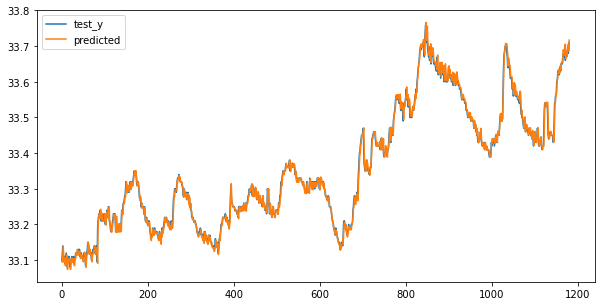

In [40]:
fd = pd.DataFrame([inv_y, inv_yhat]).T
fd.columns = ["test_y", "predicted"]
fd.plot(figsize=(10,5))

In [14]:
def f(df):
    # convert the df to match lstm data
    # load dataset
    values = df.values
    # ensure all data is float
    values = values.astype('float32')
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    # frame as supervised learning
    reframed = series_to_supervised(scaled, 1, 1)
    # drop columns we don't want to predict
    reframed.drop(reframed.columns[-2:], axis=1, inplace=True)
    #print(reframed.shape)
    ################################################################

    train_X, train_y, test_X, test_y= split_df(reframed)
    #print("input to be 3D [samples, timesteps(lag, features]\n")
    #print(f"train: {train_X.shape} , {train_y.shape} ,test: {test_X.shape} , {test_y.shape}")
    ####################################################################

    # design network
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # fit network
    history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    ##############################################################################

    # plot history
    #plt.plot(history.history['loss'], label='train')
    #plt.plot(history.history['val_loss'], label='test')
    #plt.legend()
    #plt.show()
    ##################################################################################

    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = scaler.inverse_transform(np.concatenate((yhat, test_X[:, 1:]), axis=1))[:,0]
    #inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
    #inv_yhat = scaler.inverse_transform(inv_yhat)
    #inv_yhat = inv_yhat[:,0]

    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = scaler.inverse_transform(np.concatenate((test_y, test_X[:, 1:]), axis=1))[:,0]
    #inv_y = scaler.inverse_transform(inv_y)
    #inv_y = inv_y[:,0]

    # calculate RMSE
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    #print('Test RMSE: %.3f' % rmse)
    return rmse
    #####################################################################


In [15]:
err = []
for i in range(0,25):
    ts = grouped_t_s.iloc[i]
    df = create_ts_df(ts)
    #print(df.shape)
    rmse = f(df)
    err.append(rmse)
    


Epoch 1/50
7/7 - 2s - loss: 0.3010 - val_loss: 0.7353
Epoch 2/50
7/7 - 0s - loss: 0.2615 - val_loss: 0.6912
Epoch 3/50
7/7 - 0s - loss: 0.2231 - val_loss: 0.6464
Epoch 4/50
7/7 - 0s - loss: 0.1873 - val_loss: 0.6011
Epoch 5/50
7/7 - 0s - loss: 0.1569 - val_loss: 0.5571
Epoch 6/50
7/7 - 0s - loss: 0.1350 - val_loss: 0.5162
Epoch 7/50
7/7 - 0s - loss: 0.1221 - val_loss: 0.4819
Epoch 8/50
7/7 - 0s - loss: 0.1155 - val_loss: 0.4538
Epoch 9/50
7/7 - 0s - loss: 0.1117 - val_loss: 0.4308
Epoch 10/50
7/7 - 0s - loss: 0.1094 - val_loss: 0.4127
Epoch 11/50
7/7 - 0s - loss: 0.1080 - val_loss: 0.3988
Epoch 12/50
7/7 - 0s - loss: 0.1068 - val_loss: 0.3879
Epoch 13/50
7/7 - 0s - loss: 0.1055 - val_loss: 0.3791
Epoch 14/50
7/7 - 0s - loss: 0.1042 - val_loss: 0.3719
Epoch 15/50
7/7 - 0s - loss: 0.1028 - val_loss: 0.3655
Epoch 16/50
7/7 - 0s - loss: 0.1013 - val_loss: 0.3595
Epoch 17/50
7/7 - 0s - loss: 0.0998 - val_loss: 0.3537
Epoch 18/50
7/7 - 0s - loss: 0.0982 - val_loss: 0.3478
Epoch 19/50
7/7 - 0

Epoch 47/50
32/32 - 0s - loss: 0.0127 - val_loss: 0.0090
Epoch 48/50
32/32 - 0s - loss: 0.0124 - val_loss: 0.0090
Epoch 49/50
32/32 - 0s - loss: 0.0124 - val_loss: 0.0089
Epoch 50/50
32/32 - 0s - loss: 0.0130 - val_loss: 0.0089
Epoch 1/50
48/48 - 2s - loss: 0.4163 - val_loss: 0.2987
Epoch 2/50
48/48 - 0s - loss: 0.1256 - val_loss: 0.0848
Epoch 3/50
48/48 - 0s - loss: 0.0780 - val_loss: 0.0939
Epoch 4/50
48/48 - 0s - loss: 0.0764 - val_loss: 0.0902
Epoch 5/50
48/48 - 0s - loss: 0.0731 - val_loss: 0.0854
Epoch 6/50
48/48 - 0s - loss: 0.0699 - val_loss: 0.0813
Epoch 7/50
48/48 - 0s - loss: 0.0671 - val_loss: 0.0764
Epoch 8/50
48/48 - 0s - loss: 0.0642 - val_loss: 0.0719
Epoch 9/50
48/48 - 0s - loss: 0.0616 - val_loss: 0.0667
Epoch 10/50
48/48 - 0s - loss: 0.0591 - val_loss: 0.0624
Epoch 11/50
48/48 - 0s - loss: 0.0566 - val_loss: 0.0586
Epoch 12/50
48/48 - 0s - loss: 0.0540 - val_loss: 0.0540
Epoch 13/50
48/48 - 0s - loss: 0.0513 - val_loss: 0.0505
Epoch 14/50
48/48 - 0s - loss: 0.0488 - 

Epoch 43/50
1/1 - 0s - loss: 0.0427 - val_loss: 0.0957
Epoch 44/50
1/1 - 0s - loss: 0.0426 - val_loss: 0.0949
Epoch 45/50
1/1 - 0s - loss: 0.0424 - val_loss: 0.0942
Epoch 46/50
1/1 - 0s - loss: 0.0422 - val_loss: 0.0935
Epoch 47/50
1/1 - 0s - loss: 0.0420 - val_loss: 0.0929
Epoch 48/50
1/1 - 0s - loss: 0.0418 - val_loss: 0.0923
Epoch 49/50
1/1 - 0s - loss: 0.0416 - val_loss: 0.0917
Epoch 50/50
1/1 - 0s - loss: 0.0414 - val_loss: 0.0912
Epoch 1/50
15/15 - 5s - loss: 0.3406 - val_loss: 0.2488
Epoch 2/50
15/15 - 0s - loss: 0.2582 - val_loss: 0.1579
Epoch 3/50
15/15 - 0s - loss: 0.2044 - val_loss: 0.1122
Epoch 4/50
15/15 - 0s - loss: 0.1768 - val_loss: 0.0945
Epoch 5/50
15/15 - 0s - loss: 0.1626 - val_loss: 0.0910
Epoch 6/50
15/15 - 0s - loss: 0.1533 - val_loss: 0.0887
Epoch 7/50
15/15 - 0s - loss: 0.1453 - val_loss: 0.0845
Epoch 8/50
15/15 - 0s - loss: 0.1375 - val_loss: 0.0795
Epoch 9/50
15/15 - 0s - loss: 0.1295 - val_loss: 0.0744
Epoch 10/50
15/15 - 0s - loss: 0.1209 - val_loss: 0.0688

Epoch 38/50
29/29 - 0s - loss: 0.0110 - val_loss: 0.0130
Epoch 39/50
29/29 - 0s - loss: 0.0110 - val_loss: 0.0131
Epoch 40/50
29/29 - 0s - loss: 0.0110 - val_loss: 0.0131
Epoch 41/50
29/29 - 0s - loss: 0.0109 - val_loss: 0.0129
Epoch 42/50
29/29 - 0s - loss: 0.0110 - val_loss: 0.0126
Epoch 43/50
29/29 - 0s - loss: 0.0108 - val_loss: 0.0118
Epoch 44/50
29/29 - 0s - loss: 0.0110 - val_loss: 0.0119
Epoch 45/50
29/29 - 0s - loss: 0.0107 - val_loss: 0.0120
Epoch 46/50
29/29 - 0s - loss: 0.0111 - val_loss: 0.0123
Epoch 47/50
29/29 - 0s - loss: 0.0108 - val_loss: 0.0123
Epoch 48/50
29/29 - 0s - loss: 0.0110 - val_loss: 0.0122
Epoch 49/50
29/29 - 0s - loss: 0.0107 - val_loss: 0.0116
Epoch 50/50
29/29 - 0s - loss: 0.0109 - val_loss: 0.0119
Epoch 1/50
33/33 - 2s - loss: 0.3222 - val_loss: 0.1272
Epoch 2/50
33/33 - 0s - loss: 0.1356 - val_loss: 0.1097
Epoch 3/50
33/33 - 0s - loss: 0.1223 - val_loss: 0.1033
Epoch 4/50
33/33 - 0s - loss: 0.1105 - val_loss: 0.0899
Epoch 5/50
33/33 - 0s - loss: 0.099

6/6 - 0s - loss: 0.0675 - val_loss: 0.1927
Epoch 36/50
6/6 - 0s - loss: 0.0663 - val_loss: 0.1892
Epoch 37/50
6/6 - 0s - loss: 0.0650 - val_loss: 0.1858
Epoch 38/50
6/6 - 0s - loss: 0.0637 - val_loss: 0.1823
Epoch 39/50
6/6 - 0s - loss: 0.0623 - val_loss: 0.1784
Epoch 40/50
6/6 - 0s - loss: 0.0610 - val_loss: 0.1744
Epoch 41/50
6/6 - 0s - loss: 0.0596 - val_loss: 0.1703
Epoch 42/50
6/6 - 0s - loss: 0.0583 - val_loss: 0.1660
Epoch 43/50
6/6 - 0s - loss: 0.0569 - val_loss: 0.1610
Epoch 44/50
6/6 - 0s - loss: 0.0556 - val_loss: 0.1558
Epoch 45/50
6/6 - 0s - loss: 0.0542 - val_loss: 0.1509
Epoch 46/50
6/6 - 0s - loss: 0.0528 - val_loss: 0.1466
Epoch 47/50
6/6 - 0s - loss: 0.0515 - val_loss: 0.1427
Epoch 48/50
6/6 - 0s - loss: 0.0501 - val_loss: 0.1387
Epoch 49/50
6/6 - 0s - loss: 0.0488 - val_loss: 0.1341
Epoch 50/50
6/6 - 0s - loss: 0.0474 - val_loss: 0.1289
Epoch 1/50
8/8 - 2s - loss: 0.3776 - val_loss: 0.2296
Epoch 2/50
8/8 - 0s - loss: 0.3233 - val_loss: 0.1747
Epoch 3/50
8/8 - 0s - lo

Epoch 34/50
10/10 - 0s - loss: 0.0493 - val_loss: 0.0405
Epoch 35/50
10/10 - 0s - loss: 0.0479 - val_loss: 0.0396
Epoch 36/50
10/10 - 0s - loss: 0.0468 - val_loss: 0.0381
Epoch 37/50
10/10 - 0s - loss: 0.0456 - val_loss: 0.0371
Epoch 38/50
10/10 - 0s - loss: 0.0446 - val_loss: 0.0361
Epoch 39/50
10/10 - 0s - loss: 0.0436 - val_loss: 0.0351
Epoch 40/50
10/10 - 0s - loss: 0.0427 - val_loss: 0.0343
Epoch 41/50
10/10 - 0s - loss: 0.0419 - val_loss: 0.0333
Epoch 42/50
10/10 - 0s - loss: 0.0412 - val_loss: 0.0328
Epoch 43/50
10/10 - 0s - loss: 0.0405 - val_loss: 0.0324
Epoch 44/50
10/10 - 0s - loss: 0.0399 - val_loss: 0.0316
Epoch 45/50
10/10 - 0s - loss: 0.0393 - val_loss: 0.0313
Epoch 46/50
10/10 - 0s - loss: 0.0389 - val_loss: 0.0308
Epoch 47/50
10/10 - 0s - loss: 0.0383 - val_loss: 0.0304
Epoch 48/50
10/10 - 0s - loss: 0.0379 - val_loss: 0.0299
Epoch 49/50
10/10 - 0s - loss: 0.0374 - val_loss: 0.0296
Epoch 50/50
10/10 - 0s - loss: 0.0370 - val_loss: 0.0291
Epoch 1/50
5/5 - 2s - loss: 0.3

Epoch 33/50
5/5 - 0s - loss: 0.0861 - val_loss: 0.1560
Epoch 34/50
5/5 - 0s - loss: 0.0852 - val_loss: 0.1543
Epoch 35/50
5/5 - 0s - loss: 0.0843 - val_loss: 0.1524
Epoch 36/50
5/5 - 0s - loss: 0.0833 - val_loss: 0.1505
Epoch 37/50
5/5 - 0s - loss: 0.0823 - val_loss: 0.1484
Epoch 38/50
5/5 - 0s - loss: 0.0813 - val_loss: 0.1463
Epoch 39/50
5/5 - 0s - loss: 0.0803 - val_loss: 0.1440
Epoch 40/50
5/5 - 0s - loss: 0.0792 - val_loss: 0.1416
Epoch 41/50
5/5 - 0s - loss: 0.0782 - val_loss: 0.1391
Epoch 42/50
5/5 - 0s - loss: 0.0772 - val_loss: 0.1366
Epoch 43/50
5/5 - 0s - loss: 0.0762 - val_loss: 0.1345
Epoch 44/50
5/5 - 0s - loss: 0.0752 - val_loss: 0.1326
Epoch 45/50
5/5 - 0s - loss: 0.0741 - val_loss: 0.1306
Epoch 46/50
5/5 - 0s - loss: 0.0730 - val_loss: 0.1283
Epoch 47/50
5/5 - 0s - loss: 0.0718 - val_loss: 0.1256
Epoch 48/50
5/5 - 0s - loss: 0.0707 - val_loss: 0.1227
Epoch 49/50
5/5 - 0s - loss: 0.0697 - val_loss: 0.1201
Epoch 50/50
5/5 - 0s - loss: 0.0686 - val_loss: 0.1177
Epoch 1/50

2/2 - 0s - loss: 0.3145 - val_loss: 0.4040
Epoch 20/50
2/2 - 0s - loss: 0.3050 - val_loss: 0.3886
Epoch 21/50
2/2 - 0s - loss: 0.2955 - val_loss: 0.3732
Epoch 22/50
2/2 - 0s - loss: 0.2860 - val_loss: 0.3576
Epoch 23/50
2/2 - 0s - loss: 0.2766 - val_loss: 0.3420
Epoch 24/50
2/2 - 0s - loss: 0.2678 - val_loss: 0.3266
Epoch 25/50
2/2 - 0s - loss: 0.2597 - val_loss: 0.3112
Epoch 26/50
2/2 - 0s - loss: 0.2519 - val_loss: 0.2961
Epoch 27/50
2/2 - 0s - loss: 0.2446 - val_loss: 0.2811
Epoch 28/50
2/2 - 0s - loss: 0.2378 - val_loss: 0.2665
Epoch 29/50
2/2 - 0s - loss: 0.2315 - val_loss: 0.2523
Epoch 30/50
2/2 - 0s - loss: 0.2259 - val_loss: 0.2385
Epoch 31/50
2/2 - 0s - loss: 0.2210 - val_loss: 0.2253
Epoch 32/50
2/2 - 0s - loss: 0.2166 - val_loss: 0.2126
Epoch 33/50
2/2 - 0s - loss: 0.2129 - val_loss: 0.2008
Epoch 34/50
2/2 - 0s - loss: 0.2104 - val_loss: 0.1904
Epoch 35/50
2/2 - 0s - loss: 0.2081 - val_loss: 0.1811
Epoch 36/50
2/2 - 0s - loss: 0.2062 - val_loss: 0.1725
Epoch 37/50
2/2 - 0s -

Epoch 6/50
3/3 - 0s - loss: 0.2661 - val_loss: 0.1035
Epoch 7/50
3/3 - 0s - loss: 0.2470 - val_loss: 0.0932
Epoch 8/50
3/3 - 0s - loss: 0.2285 - val_loss: 0.0869
Epoch 9/50
3/3 - 0s - loss: 0.2110 - val_loss: 0.0844
Epoch 10/50
3/3 - 0s - loss: 0.1944 - val_loss: 0.0874
Epoch 11/50
3/3 - 0s - loss: 0.1802 - val_loss: 0.0920
Epoch 12/50
3/3 - 0s - loss: 0.1685 - val_loss: 0.0989
Epoch 13/50
3/3 - 0s - loss: 0.1589 - val_loss: 0.1070
Epoch 14/50
3/3 - 0s - loss: 0.1524 - val_loss: 0.1147
Epoch 15/50
3/3 - 0s - loss: 0.1479 - val_loss: 0.1211
Epoch 16/50
3/3 - 0s - loss: 0.1443 - val_loss: 0.1269
Epoch 17/50
3/3 - 0s - loss: 0.1413 - val_loss: 0.1321
Epoch 18/50
3/3 - 0s - loss: 0.1392 - val_loss: 0.1359
Epoch 19/50
3/3 - 0s - loss: 0.1378 - val_loss: 0.1383
Epoch 20/50
3/3 - 0s - loss: 0.1367 - val_loss: 0.1394
Epoch 21/50
3/3 - 0s - loss: 0.1355 - val_loss: 0.1393
Epoch 22/50
3/3 - 0s - loss: 0.1344 - val_loss: 0.1383
Epoch 23/50
3/3 - 0s - loss: 0.1333 - val_loss: 0.1367
Epoch 24/50
3/

Text(0, 0.5, 'RMSE ')

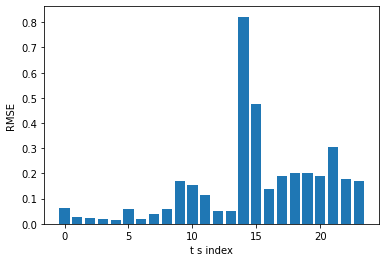

In [16]:
# plot err (rmse) for all t s in the smple 
plt.bar(range(0,len(err)-1), err[:-1])
plt.xlabel("t s index")
plt.ylabel("RMSE ")


# ploting

Text(0.5, 1.0, 'ts 15, freq:14.0, len:(375, 3)')

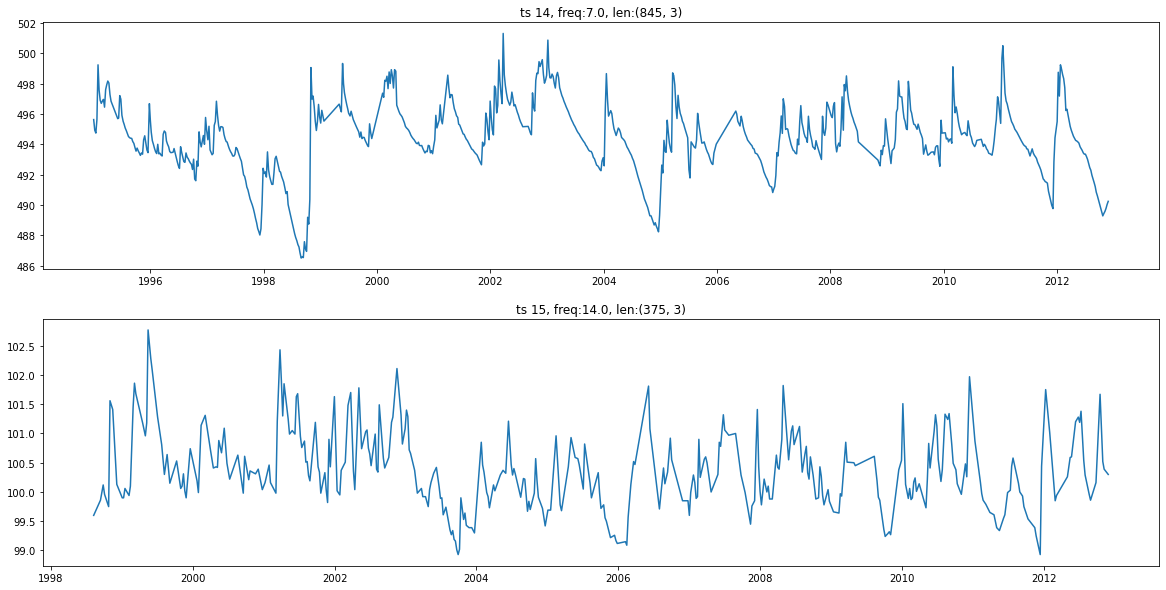

In [36]:
# plot a t s with its predictors
fig, axs = plt.subplots(2,1, figsize=(20,10))
#fig.suptitle('Vertically stacked subplots')
ts14 = grouped_t_s.iloc[14]
freq14 = ts14[-2]
df14 = create_ts_df(ts14)

ts15 = grouped_t_s.iloc[15]
freq15 = ts15[-2]
df15 = create_ts_df(ts15)

axs[0].plot(df14["ts"])
axs[0].set_title(f'ts 14, freq:{freq14}, len:{df14.shape}')
axs[1].plot(df15["ts"])
axs[1].set_title(f'ts 15, freq:{freq15}, len:{df15.shape}')
